# A classification example from soup to nuts

* Meet the problem
* Read in the data
* Inspect the data
* Prepare our dataset
* Fill in missing data
* Handle categoric data
* Train a classifier
* Engineer new features
* Train with engineered features

# Meet the problem - who survives the Titanic?

![](https://kaggle2.blob.core.windows.net/competitions/kaggle/3136/logos/front_page.png)

```
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
```                

# Read in the data

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('train.csv', index_col='PassengerId')

# Inspect the data

## Look at sample rows

In [2]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Look at summary information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Plot features

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(array([  18.,   16.,   99.,  110.,   64.,   45.,   38.,   15.,   13.,    6.]),
 array([  1. ,   8.3,  15.6,  22.9,  30.2,  37.5,  44.8,  52.1,  59.4,
         66.7,  74. ]),
 <a list of 10 Patch objects>)

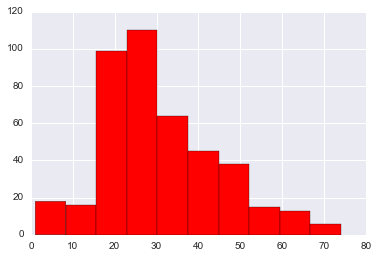

In [5]:
plt.hist(data[data['Survived'] == 0]['Age'].dropna(), color='r')

(array([ 36.,  19.,  63.,  65.,  52.,  24.,  21.,   9.,   0.,   1.]),
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 10 Patch objects>)

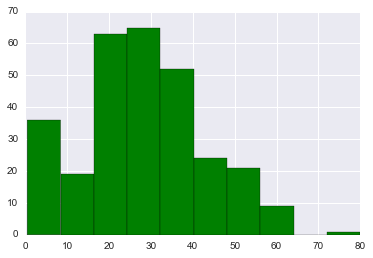

In [6]:
plt.hist(data[data['Survived'] == 1]['Age'].dropna(), color='g')

# Prepare our dataset

In [7]:
y = data['Survived']
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [8]:
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
X.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,71.2833
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500


# Explore the data a bit

# Fill in missing data

In [9]:
X.isnull().sum()

Pclass      0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [10]:
X.loc[ data['Age'].isnull(), 'Age' ] = data['Age'].median()

/Users/merlyn/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
X.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

# Handle categorical values

In [12]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Convert to binary

In [13]:
X.loc[:, 'female'] = np.where(data['Sex'] == 'female', 1, 0)
X.head()

/Users/merlyn/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


,Pclass,Age,SibSp,Parch,Fare,female
PassengerId,,,,,,
1,3,22.0,1,0,7.2500,0
2,1,38.0,1,0,71.2833,1
3,3,26.0,0,0,7.9250,1
4,1,35.0,1,0,53.1000,1
5,3,35.0,0,0,8.0500,0


## Fill in more missing values

In [14]:
data['Embarked'].isnull().sum()

2

In [15]:
data['Embarked'].mode()

0    S
dtype: object

In [16]:
data['Embarked'].mode()[0]

'S'

In [17]:
data.loc[data['Embarked'].isnull(), 'Embarked'] = data['Embarked'].mode()[0]

In [18]:
data['Embarked'].isnull().sum()

0

## One Hot encode

In [19]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [20]:
X.loc[:, 'Embarked_S'] = np.where(data['Embarked'] == 'S', 1, 0)
X.loc[:, 'Embarked_C'] = np.where(data['Embarked'] == 'C', 1, 0)
X.loc[:, 'Embarked_Q'] = np.where(data['Embarked'] == 'Q', 1, 0)
X.head()

,Pclass,Age,SibSp,Parch,Fare,female,Embarked_S,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0
2,1,38.0,1,0,71.2833,1,0,1,0
3,3,26.0,0,0,7.9250,1,1,0,0
4,1,35.0,1,0,53.1000,1,1,0,0
5,3,35.0,0,0,8.0500,0,1,0,0


# Train a classifier

## Consider the null hypothesis first

In [21]:
(y == 0).sum() / float(len(y))

0.61616161616161613

## Pick a classifier

![](http://scikit-learn.org/stable/_static/ml_map.png)

In [22]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0)
clf.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [23]:
clf.predict(X)

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1,

## Evaluate the classifier

In [24]:
(clf.predict(X) == y).sum() / float(len(y))

0.69360269360269355

## Evaluate the classifier, robustly

![](https://chrisjmccormick.files.wordpress.com/2013/07/10_fold_cv.png)

In [25]:
from sklearn.model_selection import cross_val_score
clf = LinearSVC(random_state=0)
scores = cross_val_score(clf, X, y, cv=10)
print scores
scores.mean()

[ 0.73333333  0.7         0.38202247  0.74157303  0.71910112  0.78651685
  0.78651685  0.75280899  0.70786517  0.68181818]


0.69915560095335372

# Engineer new features

In [26]:
data['Name'].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [27]:
title = data['Name'].map(lambda x: \
                  (x.split(',')[1].split(' ')[2] if ' the ' in x \
                    else x.split(',')[1].split(' ')[1]) if (',' in x) \
                  else x.split(' ')[1]) 
title.head()

PassengerId
1      Mr.
2     Mrs.
3    Miss.
4     Mrs.
5      Mr.
Name: Name, dtype: object

In [28]:
title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [29]:
X.loc[:, 'Title_Mr'] = title.isin(['Mr.']).astype(int)
X.loc[:, 'Title_Mrs'] = title.isin(['Mrs.', 'Mlle.']).astype(int)
X.loc[:, 'Title_Miss'] = title.isin(['Miss.', 'Mme', 'Ms.']).astype(int)
X.loc[:, 'Title_Master'] = title.isin(['Master.']).astype(int)
X.loc[:, 'title_Other'] = ((X['Title_Mr'] + X['Title_Mrs'] + X['Title_Miss'] + X['Title_Master']) == 0).astype(int)
X.head()

,Pclass,Age,SibSp,Parch,Fare,female,Embarked_S,Embarked_C,Embarked_Q,Title_Mr,Title_Mrs,Title_Miss,Title_Master,title_Other
PassengerId,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,0,0
2,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0,0
3,3,26.0,0,0,7.9250,1,1,0,0,0,0,1,0,0
4,1,35.0,1,0,53.1000,1,1,0,0,0,1,0,0,0
5,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,0,0


# Train with engineered features

In [30]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0)
clf.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [31]:
from sklearn.model_selection import cross_val_score
clf = LinearSVC(random_state=0)
scores = cross_val_score(clf, X, y, cv=10)
print scores
scores.mean()

[ 0.68888889  0.67777778  0.70786517  0.78651685  0.78651685  0.7752809
  0.68539326  0.71910112  0.86516854  0.72727273]


0.74197820905686074

# Where do you go from here?

* More feature engineering
* Compare with other classifiers
* Hyper-parameter tuning
* Ensemble models

# Resources

* [Pandas](pandas.pydata.org)
* [NumPy](http://www.numpy.org/)
* [Matplotlib](http://matplotlib.org/)
* [Seaborn](http://seaborn.pydata.org/)
* [Scikit-learn](scikit-learn.org)